In [164]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [165]:
import numpy as np
import momentBasedControl as mbc
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
# parameter values:
#
R=50.
toff =10
k=20.
p=0.05
v0 =1.
delta=0.1
sigma=0.01


x = mbc.vararray('x',4)
f = mbc.polyarr([0,0,0,x[0]*((np.log(2)/R)*x[3]+delta)+x[1]/R])
#g = mbc.polyarr([0,0,0,sigma*x[1]*x[3]])
g=mbc.polyarr([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,sigma*x[1]*x[3]]])
lam1=(p/R)*(x[0]+x[1])*x[3]
lam2=x[2]/toff
lam3=(x[0]+x[1])*x[3]/(k*R)


Lam = [lam1,lam2,lam3]

phi1=mbc.polyarr([0,x[0]+x[1],0,0.5*x[0]*x[3]+0.5*x[1]*x[3]])
phi2=mbc.polyarr([x[2],0,0,v0*x[2]])
phi3=mbc.polyarr([0,0,x[0]+x[1],0])

Phi = [phi1,phi2,phi3]

shs = mbc.jumpDiffusion(x,f=f,g=g,Lam=Lam,Phi=Phi)

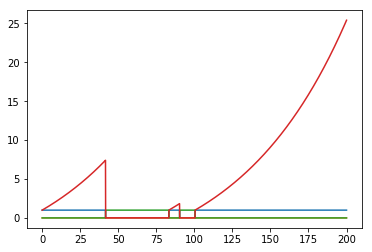

In [168]:
Time = np.linspace(0,200,4000)
x0 = [1,0,0,1]
X = shs.simulate(Time,x0)
plt.plot(Time,X)
#plt.plot([Time[0],Time[-1]],[0,0],'k:')

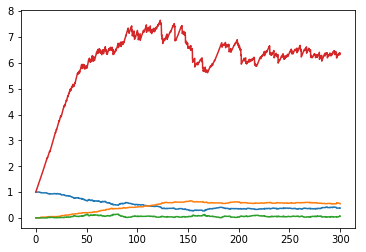

In [176]:
NumRuns = 100
Time = np.linspace(0,300,3000)

XRuns = np.zeros((NumRuns,len(Time),4))

for run in range(NumRuns):
    XRuns[run,:] = shs.simulate(Time,x0).squeeze()
    
XMeanSq = np.mean(XRuns,axis=0)
plt.plot(Time,XMeanSq)

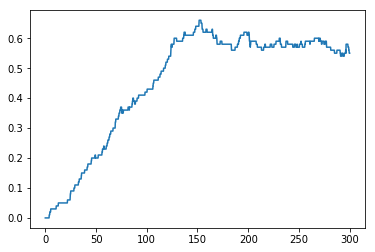

In [181]:
plt.plot(Time,XMeanSq[:,1])